EKSPLORACIJA PODATAKA

Po Grusu, klasicno ispitivanje distribucije ne daje uvek dobre rezultate. 
Treba videti na histogramu da li postoje neki posebni dzepovi podataka. 

In [1]:
def bucketize(point, bucket_size):
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points, bucket_size):
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points, bucket_size, title=""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)
    plt.show()

In [2]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import math
from math import exp, expm1, sqrt, pi
from collections import Counter

In [3]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

In [4]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    low_z, low_p = -10.0, 0 # normal_cdf(-10) is (very close to) 0
    hi_z, hi_p = 10.0, 1 # normal_cdf(10) is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # consider the midpoint
        mid_p = normal_cdf(mid_z) # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    return mid_z

In [5]:
import random
random.seed(0)
# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]
# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random())
        for _ in range(10000)]

Ovaj primer sluzi da nam pokaze da dve varijable koje imaju istu aritmeticku sredinu (0) i standardnu devijaciju (58)
imaju potpuno razlicite raspodele: uniformnu i normalnu.

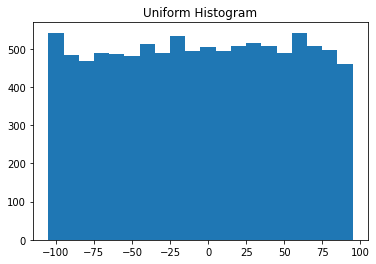

In [6]:
plot_histogram(uniform, 10, "Uniform Histogram")

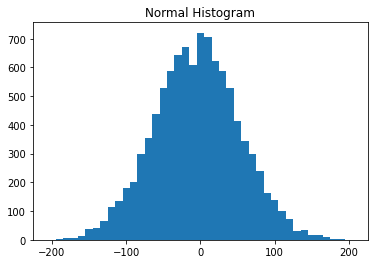

In [7]:
#while Figure 10-2 shows the distribution of normal:
plot_histogram(normal, 10, "Normal Histogram")

In this case, both distributions had pretty different max and min, but even knowing
that wouldn’t have been sufficient to understand how they differed.

In [8]:
def random_normal():
    """returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

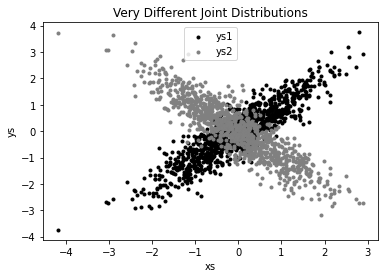

In [9]:
plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

In [10]:
def correlation_matrix(data):
    """returns the num_columns x num_columns matrix whose (i, j)th entry
    is the correlation between columns i and j of data"""
    _, num_columns = shape(data)

    def matrix_entry(i, j):
        return correlation(get_column(data, i), get_column(data, j))
        return make_matrix(num_columns, num_columns, matrix_entry)

In [11]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0 # number of elements in first row
    return num_rows, num_cols

In [15]:
import matplotlib.pyplot as plt
num_rows, num_columns = shape(xs)

TypeError: object of type 'float' has no len()

In [13]:


fig, ax = plt.subplots(num_columns, num_columns)
for i in range(num_columns):
    for j in range(num_columns):
        # scatter column_j on the x-axis vs column_i on the y-axis
        if i != j: 
            ax[i][j].scatter(get_column(data, j), get_column(data, i))
        # unless i == j, in which case show the series name
        else: 
            ax[i][j].annotate("series " + str(i), (0.5, 0.5), ycoords='axes fraction', ha="center", va="center")
        # then hide axis labels except left and bottom charts
        if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)
# fix the bottom right and top left axis labels, which are wrong because
# their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())
plt.show()

NameError: name 'num_columns' is not defined